<a href="https://colab.research.google.com/github/Wonbin-Choi/OpenCV_practice/blob/main/KNN_%EC%88%AB%EC%9E%90_%EC%9D%B8%EC%8B%9D_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving digits.png to digits.png


## 숫자 이미지 분류하여 저장하기

In [4]:
import cv2
import numpy as np

img = cv2.imread('digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 세로로 50줄, 가로로 100줄로 사진을 나눕니다.
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
# cells에는 숫자 한개씩 들어있음 1 x 1의 사진이 50 x 100의 숫자 사진들로 바뀐것
x = np.array(cells)

# 각 (20 X 20) 크기의 사진을 한 줄 (1 X 400)으로 바꿉니다.
train = x[:,:].reshape(-1,400).astype(np.float32)

# 0이 500개, 1이 500개, ...로 총 5,000개가 들어가는 (1 X 5000) 배열을 만듭니다
k = np.arange(10)
# 사진에 해당하는 숫자값들을 0,0,0,...이렇게 나열해준거임
# 정답 데이터
train_labels = np.repeat(k,500)[:,np.newaxis]

np.savez("trained.npz",train=train, train_labels=train_labels)

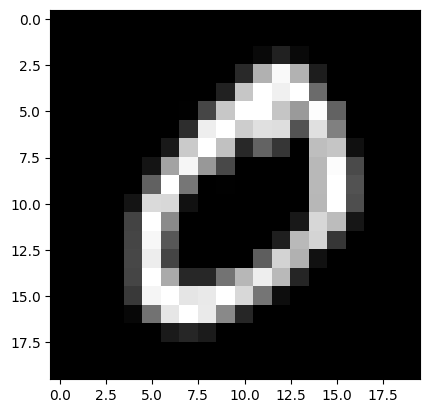

True

In [5]:
import matplotlib.pyplot as plt

# 다음과 같이 하나씩 글자를 출력할 수 있습니다.
plt.imshow(cv2.cvtColor(x[0,0],cv2.COLOR_GRAY2RGB))
plt.show()

# 다음과 같이 하나씩 글자를 저장할 수 있습니다.
# 테스트 데이터 만들
cv2.imwrite('test_0.png', x[0, 0])
cv2.imwrite('test_1.png', x[5, 0])
cv2.imwrite('test_2.png', x[10, 0])
cv2.imwrite('test_3.png', x[15, 0])
cv2.imwrite('test_4.png', x[20, 0])
cv2.imwrite('test_5.png', x[25, 0])
cv2.imwrite('test_6.png', x[30, 0])
cv2.imwrite('test_7.png', x[35, 0])
cv2.imwrite('test_8.png', x[40, 0])
cv2.imwrite('test_9.png', x[45, 0])

## KNN 숫자 인식

In [ ]:
import cv2
import numpy as np
import glob

FILE_NAME = 'trained.npz'

# 파일로부터 학습 데이터를 불러옵니다.
def load_train_data(file_name):
  with np.load(file_name) as data:
    train = data['train']
    train_labels = data['train_labels']
  return train, train_labels

# 손 글씨 이미지를 (20 X 20) 크기로 Scailing합니다.
def resize20(image):
  img = cv2.imread(image)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  gray_resize = cv2.resize(gray,(20,20))
  plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
  plt.show()
  # 최종적으로는 (1 X 400) 크기로 반환합니다.
  return gray_resize.reshape(-1,400).astype(np.float32)

def check(test,train,train_labels):
  knn = cv2.ml.KNearest_create()
  knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)
  # 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾습니다.
  ret, result, neighbours, dist = knn.findNearest(test,k=5)
  return result

train, train_labels = load_train_data(FILE_NAME)

for file_name in glob.glob('./test_*.png'):
  # 테스트 데이터
  test = resize20(file_name)
  result = check(test, train, train_labels)
  print(result)